<a href="https://colab.research.google.com/github/echiino/scratchpad/blob/main/nb_2026_02_03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! git clone https://github.com/echiino/scratchpad
%run ./scratchpad/get_data.py

Cloning into 'scratchpad'...
remote: Enumerating objects: 33, done.
remote: Counting objects: 100% (14/14), done.
remote: Compressing objects: 100% (9/9), done.
remote: Total 33 (delta 10), reused 5 (delta 5), pack-reused 19 (from 1)
Receiving objects: 100% (33/33), 32.86 KiB | 4.69 MiB/s, done.
Resolving deltas: 100% (11/11), done.
Download complete
Extracting data files...
Data extracted


In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import MinMaxScaler

def minmax(x):
    u = (x-min(x))/(max(x)-min(x))
    return u

df = pd.read_csv('/content/data/cars_env.csv')
df.head()

,veh id,manufacturer,nameplate,model,CVCM class,EPA class,fleet type,fuel type,footprint,baseline price,baseline mpg,baseline sales,predicted mpg
0,1,HONDA,Acura,MDX 4WD,11,SUV,T,G,50.8,45706.20000,22.052700,57380.0,23.011100
1,2,HONDA,Acura,RDX,11,SUV,T,G,45.1,34588.20000,24.174500,21271.0,26.457747
2,3,HONDA,Acura,RL,4,MIDSIZE CARS,C,G,47.6,47934.90000,24.562900,5132.0,23.773800
3,4,HONDA,Acura,TL,4,MIDSIZE CARS,C,G,47.8,35217.81622,27.068237,56720.0,26.884192
4,5,HONDA,Acura,TSX,3,COMPACT CARS,C,G,46.0,29483.10000,29.855173,21996.0,31.871653


In [14]:
df['EPA class'].value_counts()

,count
EPA class,
SUV,160
SUBCOMPACT CARS,77
MIDSIZE CARS,65
STANDARD PICKUP TRUCKS,53
COMPACT CARS,47
LARGE CARS,37
TWO SEATERS,27
SMALL PICKUP TRUCKS,18
SMALL STATION WAGONS,15


In [30]:
y = df['EPA class']
x = df.loc[:, ['footprint', 'baseline price']]
u = x.apply(MinMaxScaler)

x.describe()

,footprint,baseline price
count,524.000000,5.240000e+02
mean,49.427847,5.165181e+04
std,7.915366,8.968875e+04
min,36.692097,1.178304e+04
25%,44.200000,2.521127e+04
50%,47.262519,3.253602e+04
75%,52.598319,5.098088e+04
max,77.500000,1.734000e+06


In [32]:
scaler = MinMaxScaler()
u = scaler.fit_transform(x)
model = KNeighborsClassifier(n_neighbors = 5)
model = model.fit(u,y)
y_hat = model.predict(u)

In [33]:
pd.crosstab(y, y_hat)
# pd.crosstab(y, y_hat, margins=True, normalize=True)

col_0,COMPACT CARS,LARGE CARS,MIDSIZE CARS,MINIVAN,SMALL PICKUP TRUCKS,SMALL STATION WAGONS,STANDARD PICKUP TRUCKS,SUBCOMPACT CARS,SUV,TWO SEATERS,VANS
EPA class,,,,,,,,,,,
COMPACT CARS,26,1,5,0,0,3,0,4,8,0,0
LARGE CARS,2,27,2,0,0,0,0,0,6,0,0
MIDSIZE CARS,2,5,39,0,1,0,0,5,13,0,0
MIDSIZE STATION WAGONS,0,1,2,0,0,0,0,1,1,0,0
MINIVAN,0,0,1,5,0,0,0,0,1,0,0
SMALL PICKUP TRUCKS,0,0,1,2,15,0,0,0,0,0,0
SMALL STATION WAGONS,3,0,0,0,0,8,0,1,3,0,0
STANDARD PICKUP TRUCKS,0,0,0,0,0,0,51,0,2,0,0
SUBCOMPACT CARS,5,0,3,0,0,3,0,57,8,1,0


In [34]:
model.score(u,y)

0.7137404580152672

<Axes: >

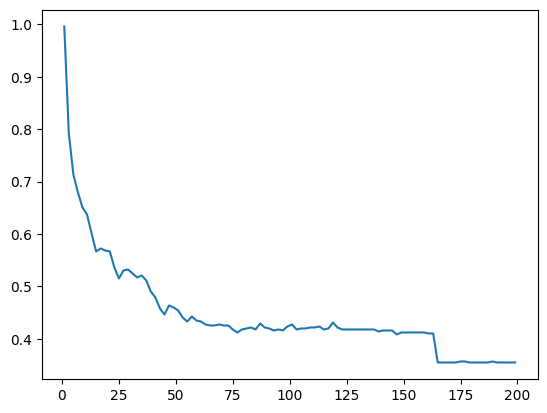

In [38]:
k_grid = [ (2*k+1) for k in range(100)]

accuracies = []
for k in k_grid: # For each candidate value of k...
    model = KNeighborsClassifier(n_neighbors = k) # Create a model instance
    model = model.fit(u,y) # Fit the model
    accuracies.append(model.score(u,y)) # Save accuracy
sns.lineplot(x=k_grid,y=accuracies)

In [35]:
from sklearn.model_selection import train_test_split
u_train, u_test, y_train, y_test = train_test_split(u,y, # Feature and target variables
                                                    test_size = .2, # Split the sample 80 train/20 test
                                                    random_state = 100) # For replication purposes

<Axes: >

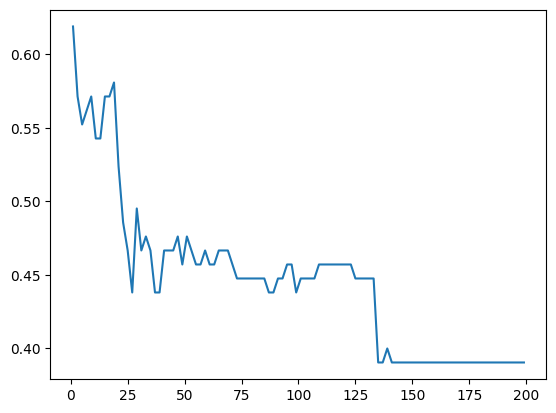

In [39]:
k_grid = [ (2*k+1) for k in range(100)] # come back to this i missed it ..

accuracies = []
for k in k_grid: # For each candidate value of k...
    model = KNeighborsClassifier(n_neighbors = k) # Create a model instance
    model = model.fit(u_train,y_train) # Fit the model
    accuracies.append(model.score(u_test,y_test)) # Save accuracy
sns.lineplot(x=k_grid,y=accuracies)

2 variables that are numeric and 1 to use as an outline(?)

In [44]:
df2 = pd.read_csv('/content/data/heart_failure_clinical_records_dataset.csv')
df2.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [45]:
df2['DEATH_EVENT'].value_counts()

,count
DEATH_EVENT,
0,203
1,96


In [46]:
y2 = df2['DEATH_EVENT']
x2 = df2.loc[:, ['sex', 'smoking']]
u2 = x2.apply(MinMaxScaler)

x2.describe()

,sex,smoking
count,299.000000,299.00000
mean,0.648829,0.32107
std,0.478136,0.46767
min,0.000000,0.00000
25%,0.000000,0.00000
50%,1.000000,0.00000
75%,1.000000,1.00000
max,1.000000,1.00000


In [47]:
scaler2 = MinMaxScaler()
u2 = scaler2.fit_transform(x2)
model2 = KNeighborsClassifier(n_neighbors = 5)
model2 = model2.fit(u2,y2)
y_hat2 = model2.predict(u2)

In [48]:
pd.crosstab(y2, y_hat2)

col_0,0,1
DEATH_EVENT,,
0,70,133
1,31,65


In [49]:
model2.score(u2,y2)

0.451505016722408

<Axes: >

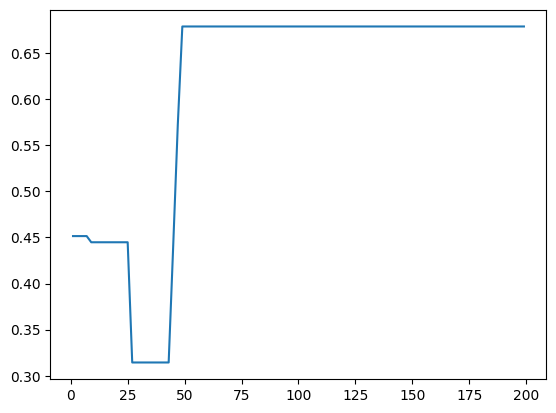

In [54]:
k_grid2 = [ (2*k+1) for k in range(100)]

accuracies2 = []
for k in k_grid2: # For each candidate value of k...
    model2 = KNeighborsClassifier(n_neighbors = k) # Create a model instance
    model2 = model2.fit(u2,y2) # Fit the model
    accuracies2.append(model2.score(u2,y2)) # Save accuracy
sns.lineplot(x=k_grid2,y=accuracies2)